In [137]:
# lets import necessary packages

import warnings
warnings.filterwarnings('ignore')

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import metrics

import pickle

In [2]:
# Lets import the data

data = pd.read_csv(r'C:\Users\joshu\Desktop\Others\Assignments\upGrad Assignments\X Education _ My Workings\Workings\Lead Scoring Assignment\Leads.csv')

In [3]:
# Lets instpect the data

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Lets deal with the null values

In [8]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
data.shape

(9240, 37)

In [10]:
data[data.TotalVisits.isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,Select,Select,02.Medium,02.Medium,14.0,15.0,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,Lateral Student,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,Potential Lead,Other Cities,02.Medium,01.High,14.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,Select,Select,02.Medium,01.High,13.0,18.0,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,Potential Lead,Select,02.Medium,01.High,14.0,19.0,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,Select,Select,02.Medium,01.High,14.0,17.0,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified


In [11]:
data.TotalVisits[data["Page Views Per Visit"].isnull()].value_counts(dropna=False)

NaN    137
Name: TotalVisits, dtype: int64

In [12]:
data.TotalVisits[data['Last Activity'].isnull()].value_counts(dropna=False)

NaN    103
Name: TotalVisits, dtype: int64

In [13]:
# Lets drop the rows which has null values in Total Visits
data_0 = data[~(data.TotalVisits.isnull())]

In [14]:
data_0.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
data_0.Specialization.value_counts(dropna = False)

Select                               1873
NaN                                  1431
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
# Lets replace null values with Select

data_0.Specialization.fillna(data_0.Specialization.mode()[0], inplace=True)

In [17]:
data_0.Specialization.isnull().sum()

0

In [18]:
# How did you hear about X Education

data_0['How did you hear about X Education'].value_counts(dropna=False)

Select                   4914
NaN                      2200
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
# Lets do the same
data_0['How did you hear about X Education'].fillna(data_0['How did you hear about X Education'].mode()[0], inplace=True)

In [20]:
data_0['How did you hear about X Education'].isnull().sum()

0

In [21]:
# What is your current occupation

data_0['What is your current occupation'].value_counts(dropna=False)

Unemployed              5502
NaN                     2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Lets replace NaN with "Not Mentioned" cause some people dont wanna mention them

data_0['What is your current occupation'].fillna("Not Mentioned", inplace=True)
data_0['What is your current occupation'].isnull().sum()

0

In [23]:
# What matters most to you in choosing a course

data_0['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6399
NaN                          2702
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [24]:
# Lets replace it with others

data_0['What matters most to you in choosing a course'].fillna("Other", inplace=True)
data_0['What matters most to you in choosing a course'].isnull().sum()

0

In [25]:
# Tags

data_0.Tags.value_counts(dropna=False)

NaN                                                  3333
Will revert after reading the email                  2035
Ringing                                              1189
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [26]:
# Lets drop the column
data_0.drop('Tags', inplace=True, axis = 1)

In [27]:
# Lead Quality

data_0['Lead Quality'].value_counts(dropna=False)

NaN                  4729
Might be             1533
Not Sure             1087
Worst                 601
High in Relevance     597
Low in Relevance      556
Name: Lead Quality, dtype: int64

In [28]:
# Lets replace NaN with "Not Sure"

data_0['Lead Quality'].fillna('Not Sure', inplace=True)
data_0['Lead Quality'].isnull().sum()

0

In [29]:
# City

data_0.City.value_counts(dropna=False)

Mumbai                         3179
Select                         2181
NaN                            1419
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# Lets replace it with "Other Cities"
data_0.City.fillna("Other Cities", inplace=True)
data_0.City.isnull().sum()

0

In [31]:
data_0['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4168
02.Medium    3753
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [32]:
data_0['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          4168
02.Medium    2748
01.High      2156
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [33]:
data_0['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN     4168
14.0    1712
15.0    1289
13.0     752
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [34]:
data_0['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     4168
15.0    1736
18.0    1066
16.0     594
17.0     568
20.0     298
19.0     224
14.0     220
13.0     198
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

We are having more than 40% of missing values in the above columns, imputing them will lead to fault predictions, its better to drop'em

In [35]:
data_0.drop(['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index'], inplace=True, axis = 1)

In [36]:
data_0.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2324
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [37]:
# Lead Source

data_0['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [38]:
# Lets replace it with Mode value

data_0['Lead Source'].fillna(data_0['Lead Source'].mode()[0], inplace=True)
data_0['Lead Source'].isnull().sum()

0

In [39]:
# Country

data_0.Country.value_counts(dropna=False)

India                   6492
NaN                     2324
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [40]:
# Lets replace it with "Others" cause I don't wanna affect the actual views from India

data_0.Country.fillna('Others', inplace=True)
data_0.Country.isnull().sum()

0

In [41]:
data_0['Lead Profile'].value_counts(dropna=False)

Select                         4079
NaN                            2702
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [42]:
# Lets replace it with "Select"

data_0['Lead Profile'].fillna(data_0['Lead Profile'].mode()[0], inplace=True)

In [43]:
data_0.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [44]:
data_0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Not Sure,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Might be,No,No,Select,Mumbai,No,No,Modified


#### Yes and No Columns

In [45]:
data_0.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
data_0.loc[:5, ['Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', ]]

,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement
0,Page Visited on Website,Others,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No
1,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No
2,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No
3,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No
4,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No
5,Olark Chat Conversation,Others,Select,Select,Not Mentioned,Other,No,No,No,No,No,No


In [47]:
Y_N_cols = ['A free copy of Mastering The Interview', 'I agree to pay the amount through cheque',
            'Get updates on DM Content', 'Update me on Supply Chain Content',
            'Receive More Updates About Our Courses', 'Through Recommendations',
            'Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article',
            'X Education Forums', 'Newspaper','Digital Advertisement']

In [48]:
for x in Y_N_cols:
    data_0[x] = data_0[x].apply(lambda x : 1 if x == "Yes" else 0)

In [49]:
data_0[Y_N_cols]

,A free copy of Mastering The Interview,I agree to pay the amount through cheque,Get updates on DM Content,Update me on Supply Chain Content,Receive More Updates About Our Courses,Through Recommendations,Do Not Call,Do Not Email,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,1,0,0,0,0,0,0
9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Lets check the columns for one hot encoding

In [50]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9103 non-null   object 
 1   Lead Number                                    9103 non-null   int64  
 2   Lead Origin                                    9103 non-null   object 
 3   Lead Source                                    9103 non-null   object 
 4   Do Not Email                                   9103 non-null   int64  
 5   Do Not Call                                    9103 non-null   int64  
 6   Converted                                      9103 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9103 non-null   int64  
 9   Page Views Per Visit                           9103 

In [51]:
data_0['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

In [52]:
data_0['Lead Source'].value_counts()

Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Category Columns

In [53]:
data_0.drop(["Prospect ID", "Lead Number"], inplace=True, axis = 1)

In [54]:
cat_cols = data_0.select_dtypes(include='object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [55]:
data_0[cat_cols].head()

,Lead Origin,Lead Source,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Quality,Lead Profile,City,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Others,Select,Select,Unemployed,Better Career Prospects,Low in Relevance,Select,Select,Modified
1,API,Organic Search,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Not Sure,Select,Select,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Might be,Potential Lead,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Not Sure,Select,Mumbai,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Might be,Select,Mumbai,Modified


In [56]:
for x in cat_cols:
    print(x)
    print(data_0[x].value_counts())
    print("-" * 125)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
Lead Source
Google               2897
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------------------------------

In [57]:
dummies = pd.get_dummies(data_0[cat_cols], drop_first=True)

In [58]:
data_1 = pd.concat([data_0, dummies], axis=1)
data_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [59]:
data_1.drop(data_1[cat_cols], axis = 1, inplace=True)

In [60]:
data_1.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.0,9103.000000,9103.000000,...,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079534,0.000220,0.380204,3.445238,481.350104,2.362820,0.001538,0.0,0.000220,0.000110,...,0.000110,0.001538,0.359222,0.020103,0.034934,0.000110,0.238603,0.003515,0.005163,0.000110
std,0.270586,0.014822,0.485464,4.854853,545.066142,2.161418,0.039189,0.0,0.014822,0.010481,...,0.010481,0.039189,0.479799,0.140361,0.183622,0.010481,0.426253,0.059189,0.071673,0.010481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,9.000000,1.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,244.000000,2.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,919.500000,3.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Preprocessing

##### Lets split the data

In [61]:
y = data_1['Converted']
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9103, dtype: int64

In [62]:
X = data_1.drop("Converted", axis = 1)
X

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,8.0,1845,2.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,2.0,199,2.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,0,3.0,499,3.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##### Train and Test Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state=100, shuffle=True, stratify=y)

In [64]:
#help(train_test_split)

##### Lets check the data imbalance

In [65]:
print(y_train.value_counts())

0    3949
1    2423
Name: Converted, dtype: int64


In [66]:
y_test.value_counts()

0    1693
1    1038
Name: Converted, dtype: int64

##### Lets Normalize the data

In [67]:
num_cols = X_train.select_dtypes(include=('int', 'float')).columns
num_cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [68]:
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [69]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.0,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.078782,0.000314,0.013696,0.214736,0.043012,0.001726,0.0,0.000157,0.000157,0.000157,...,0.000157,0.001569,0.358286,0.020873,0.032172,0.000157,0.236974,0.003453,0.005179,0.000157
std,0.269420,0.017715,0.020100,0.242789,0.039576,0.041516,0.0,0.012527,0.012527,0.012527,...,0.012527,0.039587,0.479534,0.142969,0.176471,0.012527,0.425260,0.058662,0.071784,0.012527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003984,0.003411,0.018182,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.011952,0.108275,0.036364,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.019920,0.413402,0.060545,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
X_train.Magazine.value_counts()

0.0    6372
Name: Magazine, dtype: int64

In [71]:
data.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [72]:
max_zeros = []
for x in X_train.columns:
    if X_train[x].max() == 0:
        max_zeros.append(x)

In [73]:
max_zeros

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Lead Source_Live Chat',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_testone',
 'Last Activity_Email Received',
 'Country_Kenya',
 'Country_Malaysia',
 'Country_Netherlands',
 'Country_Philippines',
 'Country_Tanzania',
 'Last Notable Activity_Email Received']

In [74]:
X_train.drop(max_zeros, axis=1, inplace=True)

In [75]:
X_test.drop(max_zeros, axis=1, inplace=True)

In [76]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.078782,0.000314,0.013696,0.214736,0.043012,0.001726,0.000157,0.000157,0.000157,0.000314,...,0.000157,0.001569,0.358286,0.020873,0.032172,0.000157,0.236974,0.003453,0.005179,0.000157
std,0.269420,0.017715,0.020100,0.242789,0.039576,0.041516,0.012527,0.012527,0.012527,0.017715,...,0.012527,0.039587,0.479534,0.142969,0.176471,0.012527,0.425260,0.058662,0.071784,0.012527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003984,0.003411,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.011952,0.108275,0.036364,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.019920,0.413402,0.060545,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
ah = X_train.columns
for x in ah:
    print(f'{x} - {X_train[x].dtypes}')

Do Not Email - float64
Do Not Call - float64
TotalVisits - float64
Total Time Spent on Website - float64
Page Views Per Visit - float64
Search - float64
Newspaper Article - float64
X Education Forums - float64
Newspaper - float64
Digital Advertisement - float64
Through Recommendations - float64
A free copy of Mastering The Interview - float64
Lead Origin_Landing Page Submission - uint8
Lead Origin_Lead Add Form - uint8
Lead Origin_Lead Import - uint8
Lead Source_Direct Traffic - uint8
Lead Source_Facebook - uint8
Lead Source_Google - uint8
Lead Source_NC_EDM - uint8
Lead Source_Olark Chat - uint8
Lead Source_Organic Search - uint8
Lead Source_Pay per Click Ads - uint8
Lead Source_Press_Release - uint8
Lead Source_Reference - uint8
Lead Source_Referral Sites - uint8
Lead Source_Welingak Website - uint8
Lead Source_bing - uint8
Lead Source_blog - uint8
Lead Source_google - uint8
Lead Source_welearnblog_Home - uint8
Lead Source_youtubechannel - uint8
Last Activity_Converted to Lead - uint

### Model 1

In [78]:
X_train_const = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                          139
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 05 Apr 2023   Deviance:                   1.0518e+05
Time:                        15:45:17   Pearson chi2:                 5.14e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     1.06e+16   8.95e+07   1.18e+08      0.000    1.06e+16    1.06e+16
Do Not Email                                                            -4.152e+14   4.51e+06  -9.21e+07      0.000   -4.15e+14   -4.15e+14
Do Not Call                                                              3.045e+15   4.79e+07   6.36e+07      0.000    3.05e+15    3.05e+15
TotalVisits                                                              1.968e+15   5.02e+07   3.92e+07      0.000    1.97e+15    1.97e+15
Total Time Spent on Website                                              7.425e+14   4.16e+06   1.79e+08      0.000    7.43e+14    7.43e+14
Page Views Per Visit                                                    -2.197e+15   3.11e+07  -7.07e+07      0.000    -2.2e+15    -2.2e+15
Search                                                                  -3.963e+14   2.24e+07  -1.77e+07      0.000   -3.96e+14   -3.96e+14
Newspaper Article                                                       -1.325e+14   5.07e+07  -2.61e+06      0.000   -1.33e+14   -1.33e+14
X Education Forums                                                      -1.325e+14   5.07e+07  -2.61e+06      0.000   -1.33e+14   -1.33e+14
Newspaper                                                                -3.78e+15   6.74e+07  -5.61e+07      0.000   -3.78e+15   -3.78e+15
Digital Advertisement                                                   -3.425e+15   6.74e+07  -5.08e+07      0.000   -3.42e+15   -3.42e+15
Through Recommendations                                                    5.4e+14   3.15e+07   1.72e+07      0.000     5.4e+14     5.4e+14
A free copy of Mastering The Interview                                   1.161e+14   3.43e+06   3.38e+07      0.000    1.16e+14    1.16e+14
Lead Origin_Landing Page Submission                                     -2.611e+14   4.23e+06  -6.18e+07      0.000   -2.61e+14   -2.61e+14
Lead Origin_Lead Add Form                                                 1.13e+15   1.53e+07    7.4e+07      0.000    1.13e+15    1.13e+15
Lead Origin_Lead Import                                                 -3.776e+15   6.75e+07   -5.6e+07      0.000   -3.78e+15   -3.78e+15
Lead Source_Direct Traffic                                               -2.42e+15    6.9e+07  -3.51e+07      0.000   -2.42e+15   -2.42e+15
Lead Source_Facebook                                                     1.952e+15   9.73e+07   2.01e+07      0.000    1.95e+15    1.95e+15
Lead Source_Google                                                      -2.306e+15   6.89e+07  -3.34e+07      0.000   -2.31e+15   -2.31e+15
Lea

### RFE

In [79]:
X_train.shape

(6372, 143)

In [80]:
log_model = LogisticRegression()

rfe = RFE(log_model, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
sel_cols = X_train.columns[rfe.support_]
len(sel_cols)

15

In [81]:
sel_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Country_Others', 'Country_Saudi Arabia',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [82]:
X_train = X_train[sel_cols]
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Country_Others', 'Country_Saudi Arabia',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

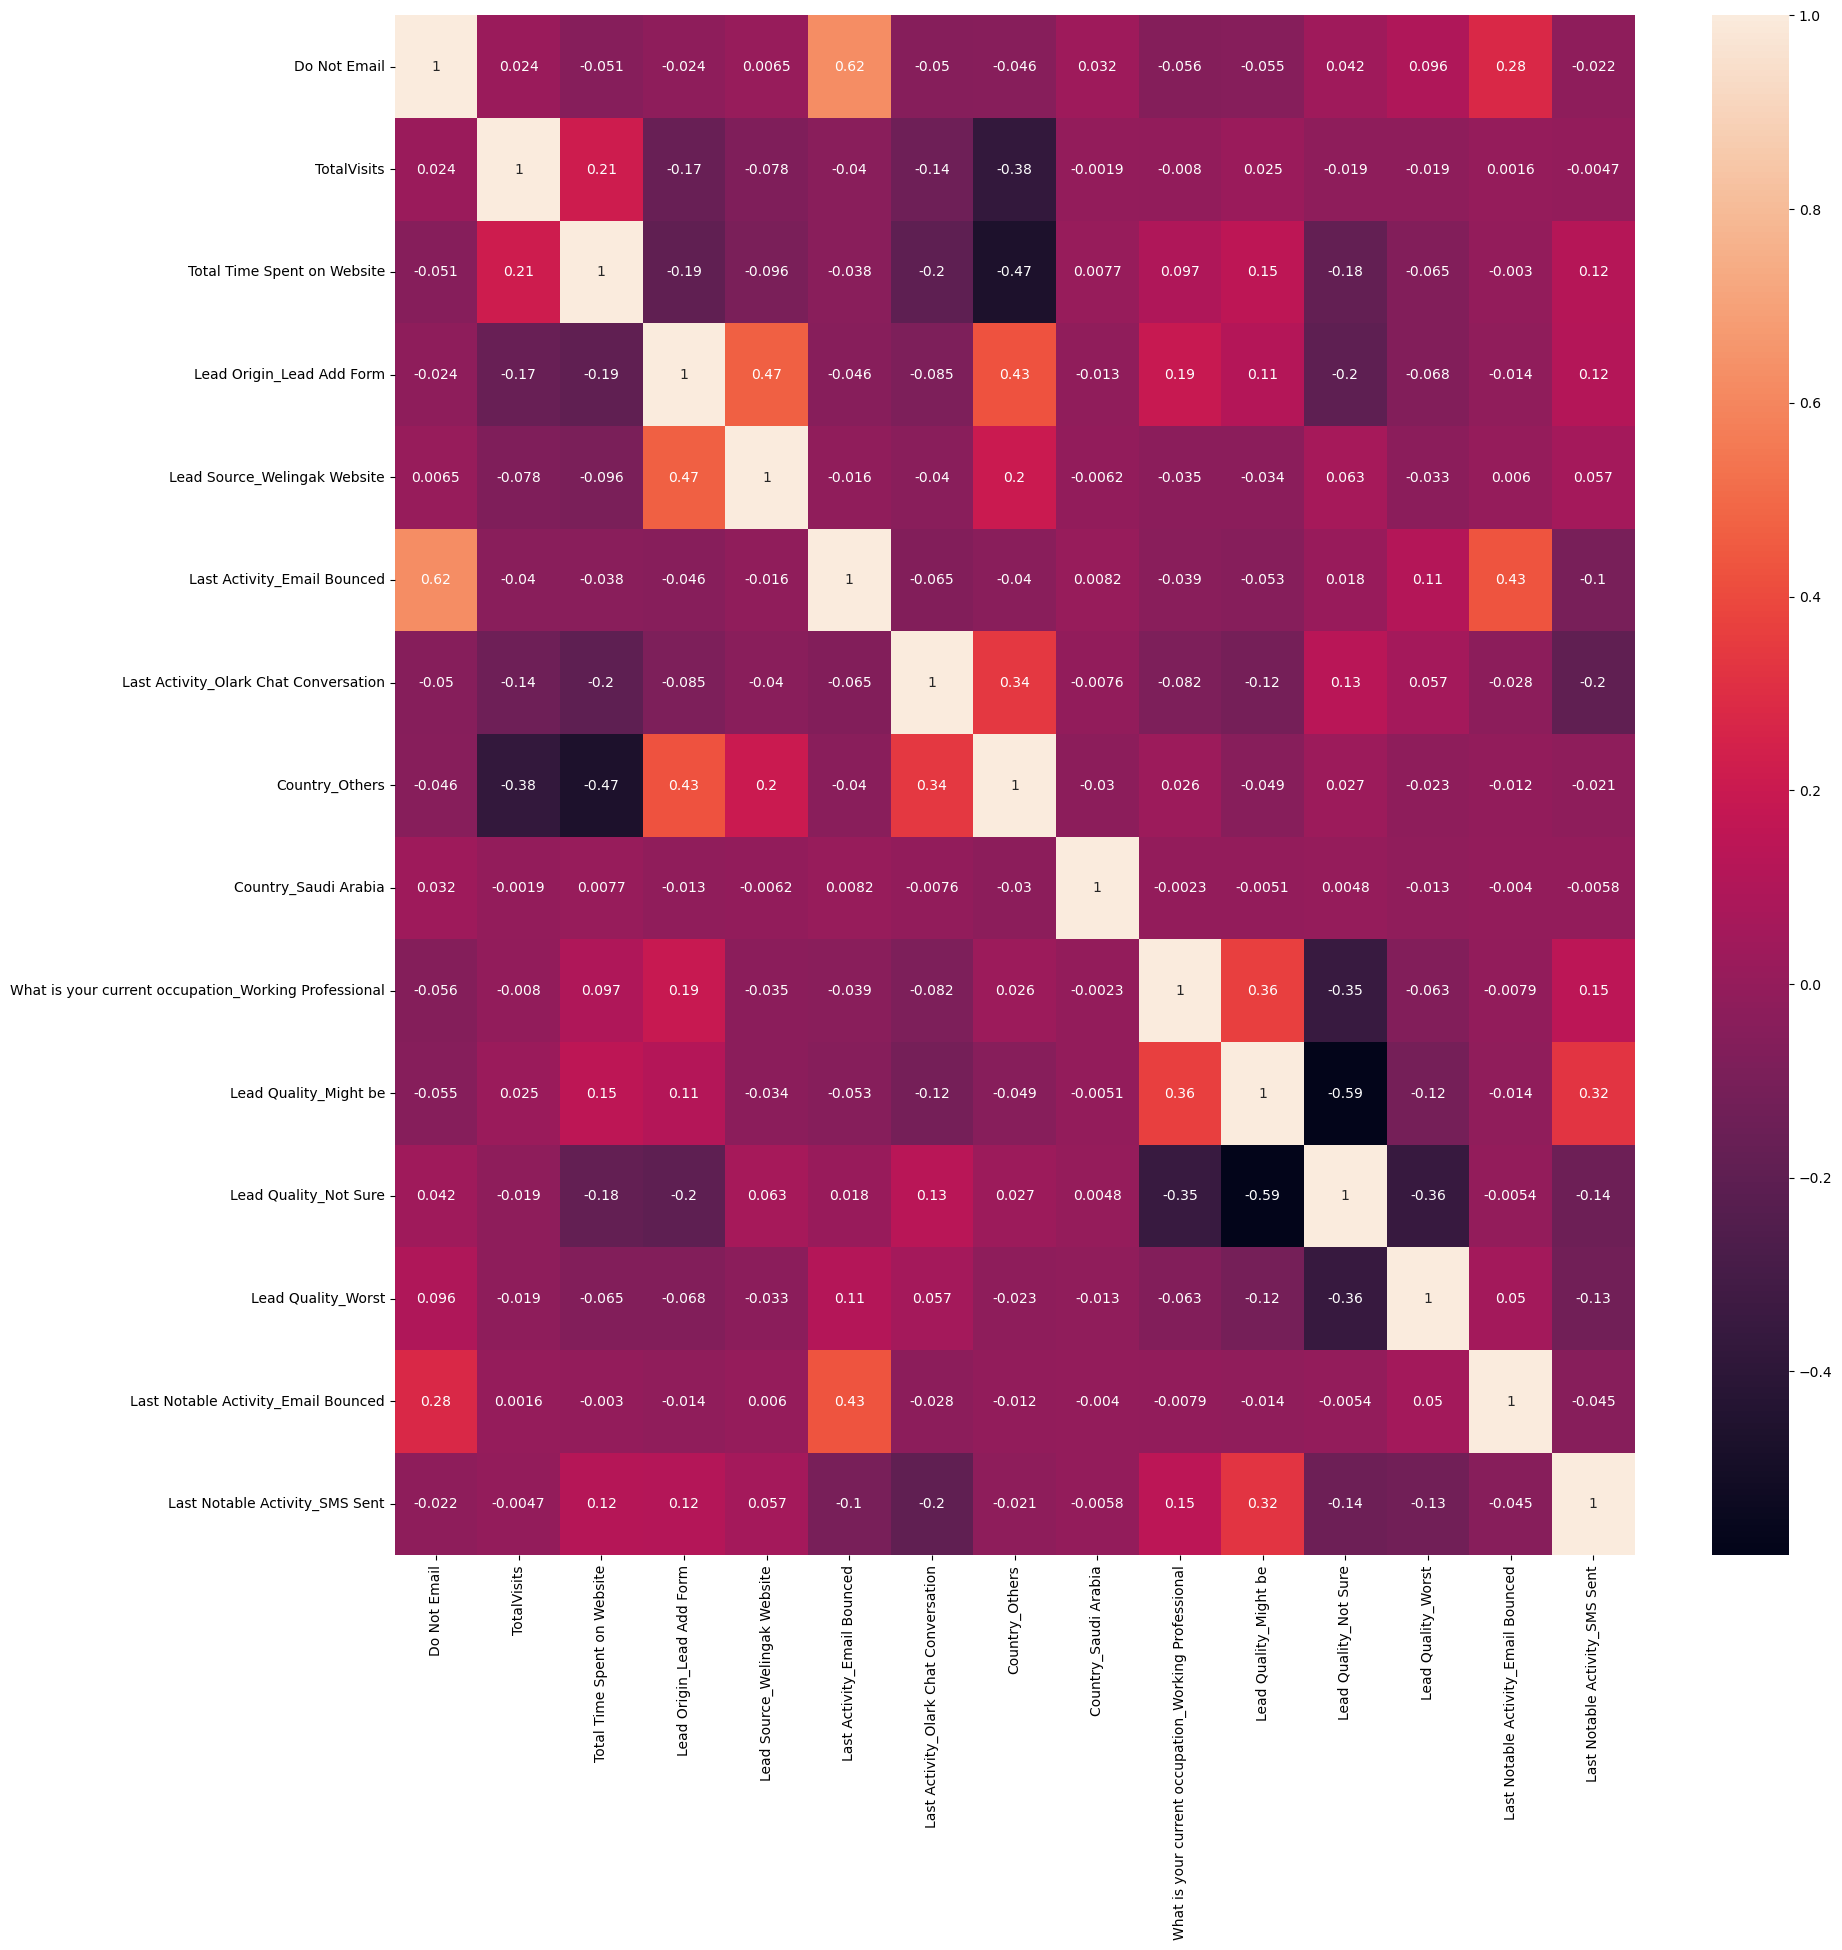

In [83]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_train[sel_cols].corr(), annot = True)
plt.show()

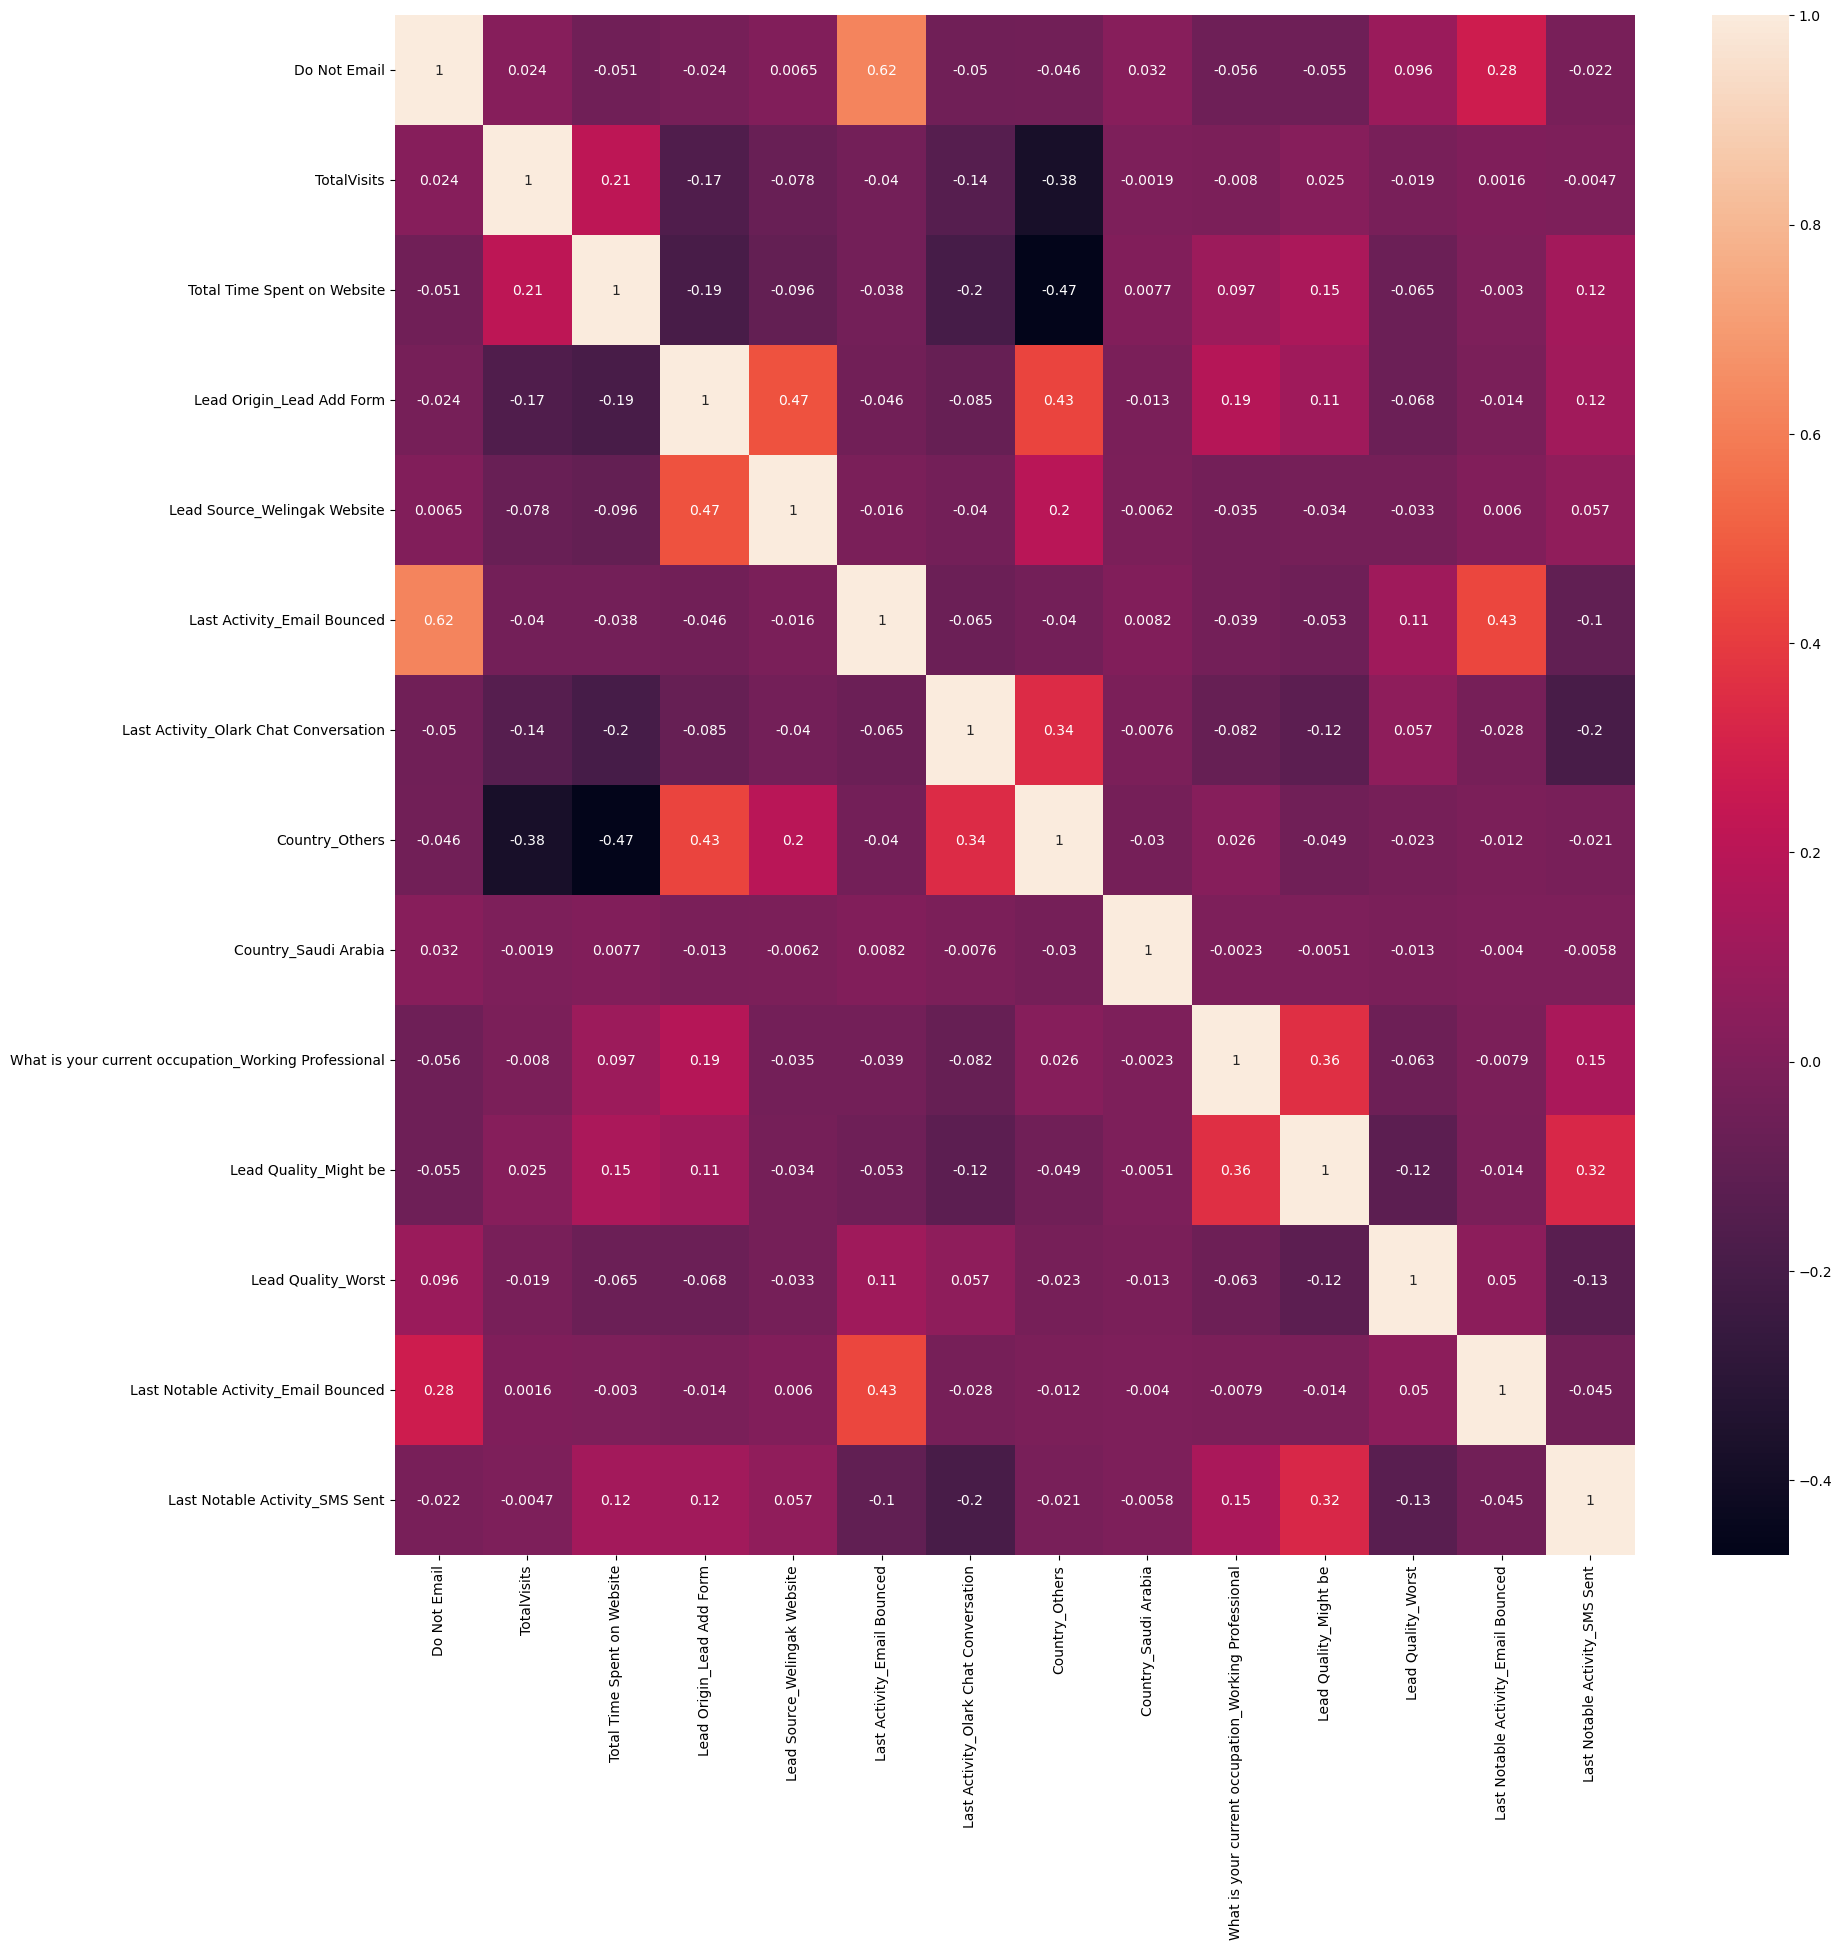

In [84]:
X_train.drop('Lead Quality_Not Sure', inplace=True, axis = 1)
sel_cols = sel_cols.drop('Lead Quality_Not Sure')

plt.figure(figsize=(20, 20))
sns.heatmap(X_train[sel_cols].corr(), annot = True)
plt.show()

In [85]:
ah2

NameError: name 'ah2' is not defined

### Model 2

In [86]:
X_train_const = sm.add_constant(X_train)

model_2 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Wed, 05 Apr 2023   Deviance:                       5080.0
Time:                        15:45:43   Pearson chi2:                 6.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5460      0.086    -29.435      0.000      -2.715      -2.376
Do Not Email                                            -1.3744      0.205     -6.697      0.000      -1.777      -0.972
TotalVisits                                              6.3410      2.285      2.775      0.006       1.862      10.820
Total Time Spent on Website                              4.5496      0.169     26.866      0.000       4.218       4.882
Lead Origin_Lead Add Form                                2.9485      0.251     11.752      0.000       2.457       3.440
Lead Source_Welingak Website                             1.8189      0.759      2.397      0.017       0.332       3.306
Last Activity_Email Bounced                             -1.5362      0.646     -2.379      0.017      -2.802      -0.271
Last Activity_Olark Chat Conversation                   -1.3797      0.162     -8.501      0.000      -1.698      -1.062
Country_Others                                           1.3543      0.112     12.044      0.000       1.134       1.575
Country_Saudi Arabia                                    -1.0489      0.751     -1.397      0.163      -2.521       0.423
What is your current occupation_Working Professional     2.5579      0.207     12.334      0.000       2.151       2.964
Lead Quality_Might be                                    1.1594      0.101     11.464      0.000       0.961       1.358
Lead Quality_Worst                                      -2.9340      0.385     -7.619      0.000      -3.689      -2.179
Last Notable Activity_Email Bounced                      2.1734      0.783      2.775      0.006       0.638       3.709
Last Notable Activity_SMS Sent                           1.3642      0.083     16.450      0.000       1.202       1.527
========================================================================================================================
"""

### Model 3

In [87]:
# Country_Saudi Arabia	
X_train.drop("Country_Saudi Arabia", axis = 1, inplace=True)

# Add Constant
X_train_const = sm.add_constant(X_train)

# Model
model_3 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.1
Date:                Wed, 05 Apr 2023   Deviance:                       5082.1
Time:                        15:46:10   Pearson chi2:                 6.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5489      0.087    -29.456      0.000      -2.718      -2.379
Do Not Email                                            -1.3841      0.205     -6.748      0.000      -1.786      -0.982
TotalVisits                                              6.4001      2.294      2.790      0.005       1.904      10.896
Total Time Spent on Website                              4.5463      0.169     26.866      0.000       4.215       4.878
Lead Origin_Lead Add Form                                2.9494      0.251     11.756      0.000       2.458       3.441
Lead Source_Welingak Website                             1.8195      0.759      2.398      0.016       0.332       3.307
Last Activity_Email Bounced                             -1.5241      0.645     -2.362      0.018      -2.789      -0.259
Last Activity_Olark Chat Conversation                   -1.3788      0.162     -8.498      0.000      -1.697      -1.061
Country_Others                                           1.3573      0.112     12.069      0.000       1.137       1.578
What is your current occupation_Working Professional     2.5505      0.207     12.322      0.000       2.145       2.956
Lead Quality_Might be                                    1.1594      0.101     11.474      0.000       0.961       1.357
Lead Quality_Worst                                      -2.9305      0.385     -7.612      0.000      -3.685      -2.176
Last Notable Activity_Email Bounced                      2.1737      0.783      2.776      0.006       0.639       3.708
Last Notable Activity_SMS Sent                           1.3643      0.083     16.457      0.000       1.202       1.527
========================================================================================================================
"""

### Model 4

In [88]:
# Last Activity_Email Bounced
X_train.drop("Last Activity_Email Bounced", axis = 1, inplace=True)

# Add Constant
X_train_const = sm.add_constant(X_train)

# Model
model_4 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.9
Date:                Wed, 05 Apr 2023   Deviance:                       5089.9
Time:                        15:46:34   Pearson chi2:                 6.88e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4112
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5649      0.087    -29.571      0.000      -2.735      -2.395
Do Not Email                                            -1.6328      0.187     -8.718      0.000      -2.000      -1.266
TotalVisits                                              6.8231      2.328      2.931      0.003       2.261      11.386
Total Time Spent on Website                              4.5512      0.169     26.898      0.000       4.220       4.883
Lead Origin_Lead Add Form                                2.9772      0.251     11.863      0.000       2.485       3.469
Lead Source_Welingak Website                             1.8457      0.760      2.428      0.015       0.356       3.336
Last Activity_Olark Chat Conversation                   -1.3672      0.162     -8.424      0.000      -1.685      -1.049
Country_Others                                           1.3617      0.113     12.093      0.000       1.141       1.582
What is your current occupation_Working Professional     2.5337      0.205     12.332      0.000       2.131       2.936
Lead Quality_Might be                                    1.1645      0.101     11.526      0.000       0.966       1.363
Lead Quality_Worst                                      -2.9344      0.385     -7.628      0.000      -3.688      -2.180
Last Notable Activity_Email Bounced                      0.9048      0.523      1.730      0.084      -0.120       1.930
Last Notable Activity_SMS Sent                           1.3872      0.083     16.783      0.000       1.225       1.549
========================================================================================================================
"""

### Model 5

In [89]:
# Last Notable Activity_Email Bounced
X_train.drop("Last Notable Activity_Email Bounced", axis = 1, inplace=True)

# Add Constant
X_train_const = sm.add_constant(X_train)

# Model
model_5 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.3
Date:                Wed, 05 Apr 2023   Deviance:                       5092.6
Time:                        15:46:55   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4109
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5639      0.087    -29.518      0.000      -2.734      -2.394
Do Not Email                                            -1.5378      0.176     -8.758      0.000      -1.882      -1.194
TotalVisits                                              6.8324      2.344      2.915      0.004       2.238      11.427
Total Time Spent on Website                              4.5518      0.169     26.919      0.000       4.220       4.883
Lead Origin_Lead Add Form                                2.9656      0.251     11.828      0.000       2.474       3.457
Lead Source_Welingak Website                             1.8660      0.761      2.453      0.014       0.375       3.357
Last Activity_Olark Chat Conversation                   -1.3720      0.162     -8.455      0.000      -1.690      -1.054
Country_Others                                           1.3652      0.113     12.118      0.000       1.144       1.586
What is your current occupation_Working Professional     2.5445      0.206     12.335      0.000       2.140       2.949
Lead Quality_Might be                                    1.1661      0.101     11.543      0.000       0.968       1.364
Lead Quality_Worst                                      -2.9335      0.385     -7.624      0.000      -3.688      -2.179
Last Notable Activity_SMS Sent                           1.3788      0.082     16.731      0.000       1.217       1.540
========================================================================================================================
"""

### Model 6

In [90]:
# Lead Source_Welingak Website	
X_train.drop("Lead Source_Welingak Website", axis = 1, inplace=True)

# Add Constant
X_train_const = sm.add_constant(X_train)

# Model
model_6 = sm.GLM(y_train, X_train_const, sm.families.Binomial())
model_6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.9
Date:                Wed, 05 Apr 2023   Deviance:                       5101.8
Time:                        15:48:53   Pearson chi2:                 7.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4100
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5635      0.087    -29.515      0.000      -2.734      -2.393
Do Not Email                                            -1.5142      0.174     -8.726      0.000      -1.854      -1.174
TotalVisits                                              6.8145      2.345      2.906      0.004       2.218      11.411
Total Time Spent on Website                              4.5507      0.169     26.920      0.000       4.219       4.882
Lead Origin_Lead Add Form                                3.3427      0.238     14.075      0.000       2.877       3.808
Last Activity_Olark Chat Conversation                   -1.3672      0.162     -8.442      0.000      -1.685      -1.050
Country_Others                                           1.3636      0.113     12.110      0.000       1.143       1.584
What is your current occupation_Working Professional     2.5370      0.207     12.281      0.000       2.132       2.942
Lead Quality_Might be                                    1.1597      0.101     11.468      0.000       0.962       1.358
Lead Quality_Worst                                      -2.9443      0.385     -7.640      0.000      -3.700      -2.189
Last Notable Activity_SMS Sent                           1.3808      0.082     16.774      0.000       1.219       1.542
========================================================================================================================
"""

### Draft Model

In [91]:
draft_model = model_6.fit()

##### Prediction on train data

In [92]:
y_train_pred = draft_model.predict(X_train_const)

In [93]:
comp_pred_train = pd.DataFrame(y_train_pred.values, y_train.values)
comp_pred_train.reset_index(inplace=True)
comp_pred_train.columns = ["Actual", "Pred_raw"]
comp_pred_train

,Actual,Pred_raw
0,0,0.186553
1,1,0.994350
2,0,0.113487
3,1,0.324433
4,0,0.067834
...,...,...
6367,0,0.509137
6368,0,0.194095
6369,1,0.918258
6370,0,0.082721


In [94]:
comp_pred_train['pred'] = comp_pred_train.Pred_raw.apply(lambda x : 1 if x > 0.5 else 0)
comp_pred_train

,Actual,Pred_raw,pred
0,0,0.186553,0
1,1,0.994350,1
2,0,0.113487,0
3,1,0.324433,0
4,0,0.067834,0
...,...,...,...
6367,0,0.509137,1
6368,0,0.194095,0
6369,1,0.918258,1
6370,0,0.082721,0


##### Evaluation on Train data

In [95]:
comp_pred_train.Actual.sum() - comp_pred_train.pred.sum()

240

In [96]:
confusion_matrix(comp_pred_train.Actual, comp_pred_train.pred)

array([[3489,  460],
       [ 700, 1723]], dtype=int64)

In [97]:
accuracy_score(comp_pred_train.Actual, comp_pred_train.pred)

0.8179535467671061

##### Preparing Test Data Set

In [98]:
X_test = X_test[sel_cols] 
X_test.drop(["Lead Source_Welingak Website", "Last Notable Activity_Email Bounced", "Last Activity_Email Bounced", "Country_Saudi Arabia"], inplace=True, axis = 1)
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Country_Others,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Worst,Last Notable Activity_SMS Sent
8075,1,0.0,0,1,0,1,1,1,0,0
1636,0,0.0,0,0,0,1,0,0,0,0
7621,0,0.0,0,0,0,1,0,0,0,0
2769,0,17.0,1194,0,0,0,0,0,0,0
1646,0,2.0,925,0,1,0,0,0,0,0


In [99]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Country_Others',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [100]:
X_train_const.columns

Index(['const', 'Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Country_Others',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [101]:
# Normalizing the data
X_test = scaler.fit_transform(X_test)

In [102]:
# Lets add constant
X_test_const = sm.add_constant(X_test)

# Prediction
pred_Test = draft_model.predict(X_test_const)
pred_Test

array([0.98694481, 0.23149758, 0.23149758, ..., 0.94649544, 0.23149758,
       0.54207295])

In [103]:
pred_test_comp = pd.DataFrame(y_test.values, pred_Test)
pred_test_comp.reset_index(inplace=True)
pred_test_comp.columns = ["predicted_raw", "actual"]
pred_test_comp

,predicted_raw,actual
0,0.986945,1
1,0.231498,0
2,0.231498,0
3,0.701731,1
4,0.125227,1
...,...,...
2726,0.769434,1
2727,0.812719,1
2728,0.946495,1
2729,0.231498,0


In [104]:
pred_test_comp['predicted'] = pred_test_comp.predicted_raw.apply(lambda x : 1 if x > 0.5 else 0)
pred_test_comp

,predicted_raw,actual,predicted
0,0.986945,1,1
1,0.231498,0,0
2,0.231498,0,0
3,0.701731,1,1
4,0.125227,1,0
...,...,...,...
2726,0.769434,1,1
2727,0.812719,1,1
2728,0.946495,1,1
2729,0.231498,0,0


In [110]:
sum(pred_test_comp.actual) - sum(pred_test_comp.predicted)

73

In [106]:
confusion_matrix(pred_test_comp.actual, pred_test_comp.predicted)

array([[1478,  215],
       [ 288,  750]], dtype=int64)

In [107]:
accuracy_score(pred_test_comp.actual, pred_test_comp.predicted)

0.8158183815452216

#### For best threshold other than 0.5

In [112]:
help(metrics.roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(pred_test_comp.actual, pred_test_comp.predicted_raw, drop_intermediate=False)

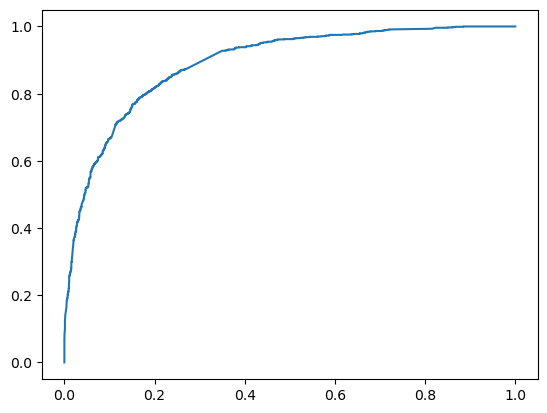

In [114]:
plt.plot(fpr, tpr)
plt.show()

In [118]:
auc_score = metrics.roc_auc_score(pred_test_comp.actual, pred_test_comp.predicted_raw)

In [119]:
# help(metrics.roc_auc_score)

In [124]:
cus_thresholds = [x/10 for x in range(0,11)]
cus_thresholds

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [125]:
pred_test_comp

,predicted_raw,actual,predicted
0,0.986945,1,1
1,0.231498,0,0
2,0.231498,0,0
3,0.701731,1,1
4,0.125227,1,0
...,...,...,...
2726,0.769434,1,1
2727,0.812719,1,1
2728,0.946495,1,1
2729,0.231498,0,0


In [127]:
for i in cus_thresholds:
    pred_test_comp[i] = pred_test_comp.predicted_raw.apply(lambda x : 1 if x > i else 0)

In [128]:
pred_test_comp

,predicted_raw,actual,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,0.986945,1,1,1,1,1,1,1,1,1,1,1,1,0
1,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0
2,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0
3,0.701731,1,1,1,1,1,1,1,1,1,1,0,0,0
4,0.125227,1,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.769434,1,1,1,1,1,1,1,1,1,1,0,0,0
2727,0.812719,1,1,1,1,1,1,1,1,1,1,1,0,0
2728,0.946495,1,1,1,1,1,1,1,1,1,1,1,1,0
2729,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0


In [131]:
cutoff_df = pd.DataFrame(columns=["x", "accuracy", "sensi", "speci"])

for x in cus_thresholds:
    cm = confusion_matrix(pred_test_comp.actual, pred_test_comp[x])
    total = sum(sum(cm))
    accu = (cm[0,0] + cm[1,1]) / total
    sensi = cm[1,1] / (cm[1,1] + cm[1,0])
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    cutoff_df.loc[x] = [x, accu, sensi, speci]
    
cutoff_df

,x,accuracy,sensi,speci
0.0,0.0,0.380081,1.000000,0.000000
0.1,0.1,0.591725,0.977842,0.354991
0.2,0.2,0.741120,0.932563,0.623745
0.3,0.3,0.798242,0.847784,0.767868
0.4,0.4,0.814354,0.792871,0.827525
0.5,0.5,0.815818,0.722543,0.873006
0.6,0.6,0.807030,0.637765,0.910809
0.7,0.7,0.801172,0.576108,0.939161
0.8,0.8,0.772611,0.463391,0.962197
0.9,0.9,0.723911,0.298651,0.984643


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

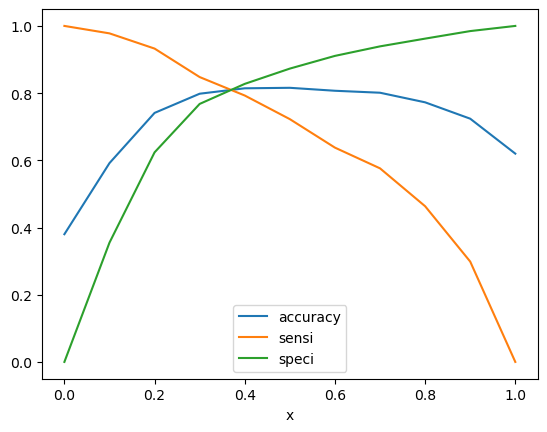

In [133]:
cutoff_df.plot.line(x = 'x', y = ["accuracy", "sensi", "speci"])
plt.plot

In [134]:
# Selected 0.37 as best threshold
pred_test_comp['Final_prediction'] = pred_test_comp.predicted_raw.apply(lambda x : 1 if x > 0.37 else 0)
pred_test_comp

,predicted_raw,actual,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,Final_prediction
0,0.986945,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0.701731,1,1,1,1,1,1,1,1,1,1,0,0,0,1
4,0.125227,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.769434,1,1,1,1,1,1,1,1,1,1,0,0,0,1
2727,0.812719,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2728,0.946495,1,1,1,1,1,1,1,1,1,1,1,1,0,1
2729,0.231498,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [135]:
confusion_matrix(pred_test_comp.actual, pred_test_comp.Final_prediction)

array([[1377,  316],
       [ 201,  837]], dtype=int64)

In [136]:
accuracy_score(pred_test_comp.actual, pred_test_comp.Final_prediction)

0.8106920541926035

In [138]:
# Lets save the model
pickle.dump(draft_model, open("X_Education_Lead_pred.pkl",'wb'))

Now X Education can use the above model to predict the leads

(i.e. the leads that are most likely to convert into paying customers)